# 사용 라이브러리

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

# train.csv
---
* 건물 개수 : 100개
* 데이터 범위 : 2022/6/1 ~ 2022/8/24

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Data/power

/content/drive/MyDrive/Data/power


In [ ]:
train = pd.read_csv("train.csv")
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


## 간단한 전처리
---
* 일시(날짜 + 시간) --> 날짜, 시간
* 날짜(년, 월, 일, 요일) -> 년, 월, 일, 요일
* 'num_data_time', '일시' 열 제거
* 평일 여부(True/False) 분류

In [ ]:
s = train['일시'].str.split(" ")
train["날짜"] = s.str.get(0)
train["시간"] = s.str.get(1)
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),날짜,시간
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,20220601,00
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,20220601,01
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,20220601,02
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,20220601,03
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,20220601,04
...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,20220824,19
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,20220824,20
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,20220824,21
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,20220824,22


In [ ]:
train['일시'] = pd.to_datetime(train['일시'], format = '%Y%m%d %H')

train['일'] = train['일시'].dt.day
train['월'] = train['일시'].dt.month
train['연도'] = train['일시'].dt.year
train['요일'] = train['일시'].dt.weekday
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),날짜,시간,일,월,연도,요일
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,20220601,00,1,6,2022,2
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,20220601,01,1,6,2022,2
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,20220601,02,1,6,2022,2
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,20220601,03,1,6,2022,2
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,20220601,04,1,6,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,NaN,0.9,86.0,0.5,NaN,881.04,20220824,19,24,8,2022,2
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,NaN,1.3,86.0,0.0,NaN,798.96,20220824,20,24,8,2022,2
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,NaN,1.0,92.0,NaN,NaN,825.12,20220824,21,24,8,2022,2
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,NaN,0.3,94.0,NaN,NaN,640.08,20220824,22,24,8,2022,2


In [ ]:
train = train.drop(["num_date_time"], axis = 1)

train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),날짜,시간,일,월,연도,요일
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,20220601,00,1,6,2022,2
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,20220601,01,1,6,2022,2
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,20220601,02,1,6,2022,2
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,20220601,03,1,6,2022,2
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,20220601,04,1,6,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,NaN,0.9,86.0,0.5,NaN,881.04,20220824,19,24,8,2022,2
203996,100,2022-08-24 20:00:00,22.4,NaN,1.3,86.0,0.0,NaN,798.96,20220824,20,24,8,2022,2
203997,100,2022-08-24 21:00:00,21.3,NaN,1.0,92.0,NaN,NaN,825.12,20220824,21,24,8,2022,2
203998,100,2022-08-24 22:00:00,21.0,NaN,0.3,94.0,NaN,NaN,640.08,20220824,22,24,8,2022,2


In [ ]:
train['평일'] = [ False if ((w == 5) or (w == 6)) else True for w in train['요일']]
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),날짜,시간,일,월,연도,요일,평일
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,20220601,00,1,6,2022,2,True
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,20220601,01,1,6,2022,2,True
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,20220601,02,1,6,2022,2,True
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,20220601,03,1,6,2022,2,True
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,20220601,04,1,6,2022,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,NaN,0.9,86.0,0.5,NaN,881.04,20220824,19,24,8,2022,2,True
203996,100,2022-08-24 20:00:00,22.4,NaN,1.3,86.0,0.0,NaN,798.96,20220824,20,24,8,2022,2,True
203997,100,2022-08-24 21:00:00,21.3,NaN,1.0,92.0,NaN,NaN,825.12,20220824,21,24,8,2022,2,True
203998,100,2022-08-24 22:00:00,21.0,NaN,0.3,94.0,NaN,NaN,640.08,20220824,22,24,8,2022,2,True


In [ ]:
train = train[['건물번호', '일시', '날짜', '연도', '월', '일','요일','평일','시간', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)']]
train

,건물번호,일시,날짜,연도,월,일,요일,평일,시간,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1,2022-06-01 00:00:00,20220601,2022,6,1,2,True,00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,2022-06-01 01:00:00,20220601,2022,6,1,2,True,01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,2022-06-01 02:00:00,20220601,2022,6,1,2,True,02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,2022-06-01 03:00:00,20220601,2022,6,1,2,True,03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,2022-06-01 04:00:00,20220601,2022,6,1,2,True,04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,20220824,2022,8,24,2,True,19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100,2022-08-24 20:00:00,20220824,2022,8,24,2,True,20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100,2022-08-24 21:00:00,20220824,2022,8,24,2,True,21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100,2022-08-24 22:00:00,20220824,2022,8,24,2,True,22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


## EDA

결측치 확인

In [ ]:
train.isnull().sum()

건물번호               0
일시                 0
날짜                 0
연도                 0
월                  0
일                  0
요일                 0
평일                 0
시간                 0
기온(C)              0
강수량(mm)       160069
풍속(m/s)           19
습도(%)              9
일조(hr)         75182
일사(MJ/m2)      87913
전력소비량(kWh)         0
dtype: int64

### 전력 사용량 분포

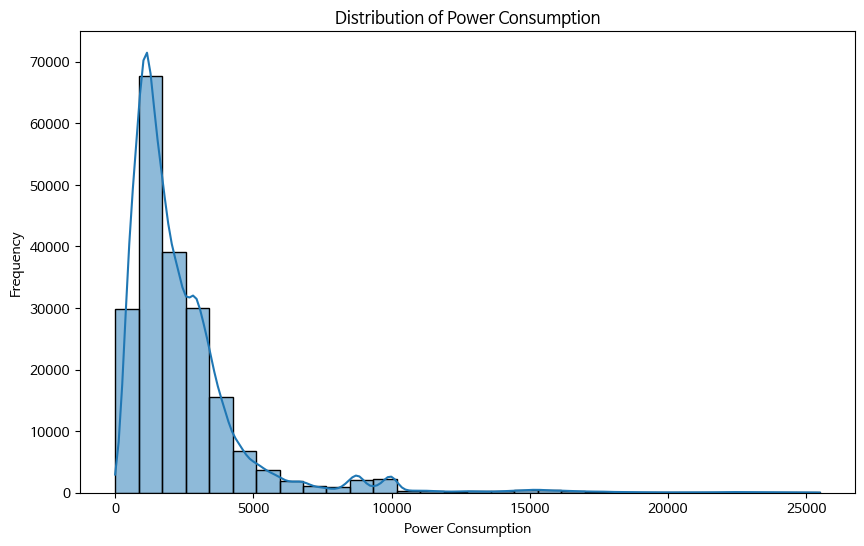

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(train['전력소비량(kWh)'], bins = 30, kde = True)
plt.title("Distribution of Power Consumption")
plt.xlabel("Power Consumption")
plt.ylabel("Frequency")
plt.show()

대부분의 데이터가 0 ~ 10000 범위 안에 존재

### 전력 소비량 추이

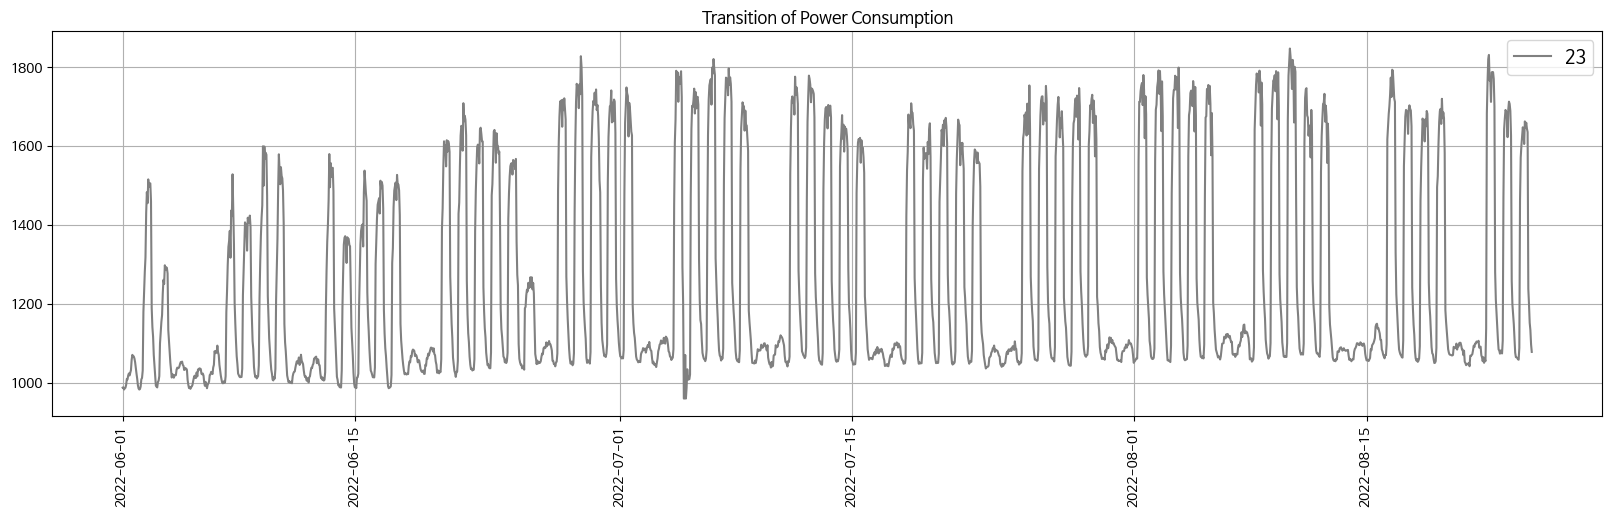

In [ ]:
building_num = 23
d = train[(train['건물번호'] == building_num)]
plt.figure(figsize = (20, 5))
plt.title("Transition of Power Consumption")
plt.plot(d['일시'], d['전력소비량(kWh)'], '-', color = 'grey', label = str(building_num))
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

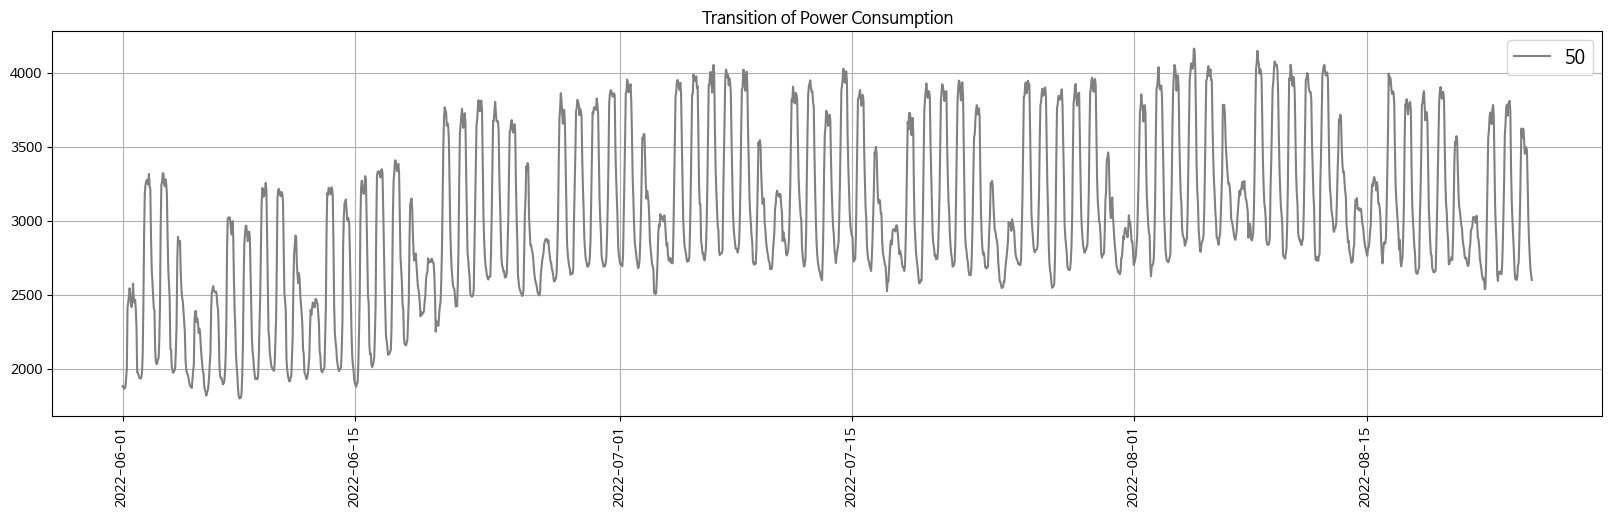

In [ ]:
building_num = 50
d = train[(train['건물번호'] == building_num)]
plt.figure(figsize = (20, 5))
plt.title("Transition of Power Consumption")
plt.plot(d['일시'], d['전력소비량(kWh)'], '-', color = 'grey', label = str(building_num))
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

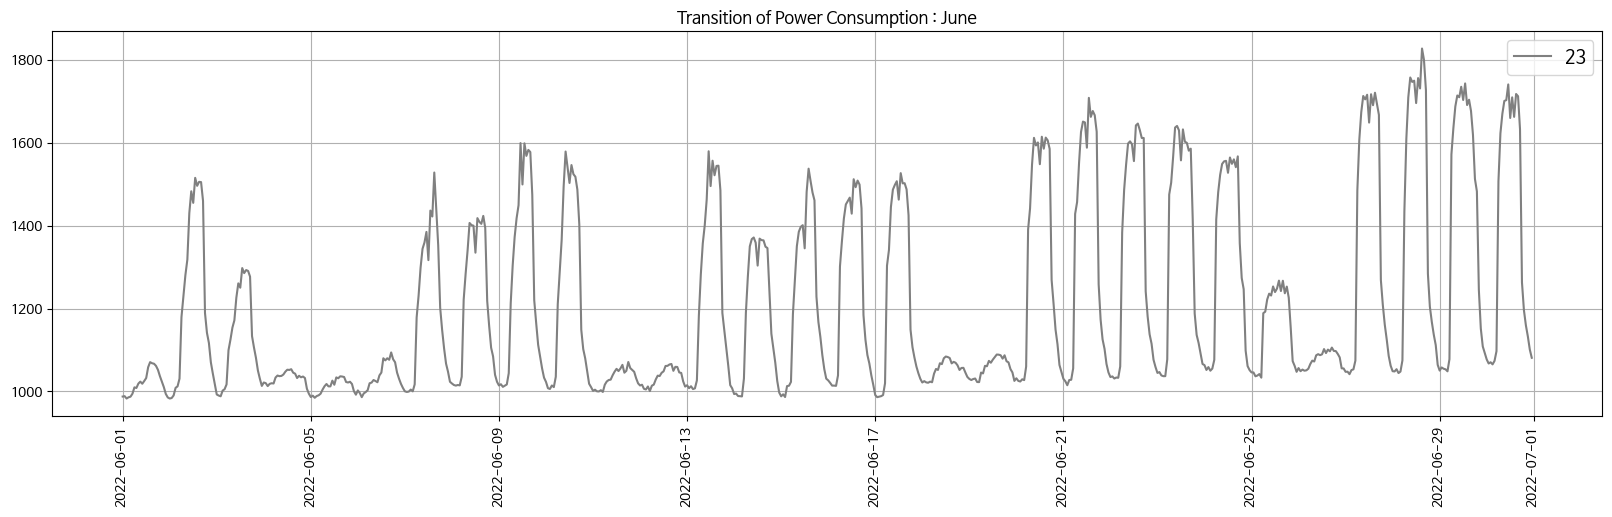

In [ ]:
building_num = 23
d = train[(train['건물번호'] == building_num) & (train['월'] == 6)]
plt.figure(figsize = (20, 5))
plt.title("Transition of Power Consumption : June")
plt.plot(d['일시'], d['전력소비량(kWh)'], '-', color = 'grey', label = str(building_num))
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

* 2022/06/04 : 토요일
* 2022/06/05 : 일요일
* 2022/06/06 : 현충일(공휴일)
* 2022/06/12 : 토요일
* 2022/06/13 : 일요일
---
주말, 공휴일에는 평일과 비교했을 때, 전력 사용량이 줄어드는 경향을 보인다.

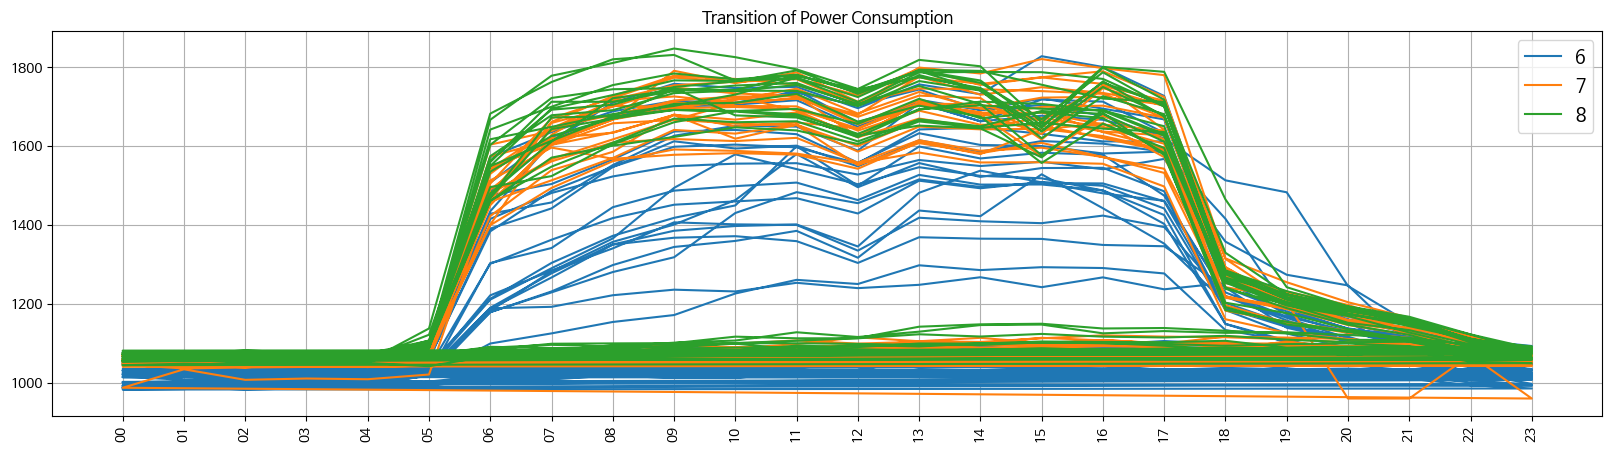

In [ ]:
plt.figure(figsize = (20, 5))
plt.title("Transition of Power Consumption")
for month in [6, 7, 8]:
  d = train[(train['건물번호'] == 23)&(train['월'] == month)]
  plt.plot(d['시간'], d['전력소비량(kWh)'], '-', label = str(month))
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

* 문제점 : 23시와 00시는 연속된 숫자이지만, 따로 순환성을 처리하지 않았을 경우 위와 같은 그래프로 표현될 수 있다.
  * 이는, 모델 학습에도 문제가 생길 위험이 있기 때문에 순환성을 띄도록 처리해야 한다.
* 6월 -> 7월 -> 8월 순으로, 전력 사용량이 높아지는 추이를 보인다.

# building_info.csv

## 데이터 불러오기

In [ ]:
building = pd.read_csv("building_info.csv")
building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


* 태양광 용량 : 태양광 패널(모듈)을 설치한 건물의 경우, 패널의 용량
* ESS 저장용량 : 에너지(풍력, 태양광 등) 저장 장치의 용량
* PCS 용량 : 사용자가 원하는 전력 형태로 변환하고 흐름을 제어하는 장치로, ESS 내에 존재한다.
(+) 기본적으로 PCS 용량은 발전소 용량의 80~90% 수준, ESS 용량은 3.5배 기준 권장

## 결측치 확인
---
건물 정보 데이터에서는 결측치가 '-'로 표시되어 있다.

In [ ]:
len(building.loc[building['태양광용량(kW)'] == '-'])

64

In [ ]:
len(building.loc[building['ESS저장용량(kWh)'] == '-'])

95

In [ ]:
len(building.loc[building['PCS용량(kW)'] == '-'])

95

In [ ]:
building.replace('-', np.nan)
building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [ ]:
building= building.fillna(0)
building = building.replace('-', 0)
building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,0,0,0
1,2,건물기타,122233.47,99000.00,0,0,0
2,3,건물기타,171243.00,113950.00,40,0,0
3,4,건물기타,74312.98,34419.62,60,0,0
4,5,건물기타,205884.00,150000.00,0,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,0,0,0
96,97,호텔및리조트,55144.67,25880.00,0,0,0
97,98,호텔및리조트,53578.62,17373.75,0,0,0
98,99,호텔및리조트,53499.00,40636.00,0,0,0


## EDA
---
EDA를 위한 데이터 병합

In [ ]:
data = pd.merge(train, building, on = '건물번호', how = 'left')
data

,건물번호,일시,날짜,연도,월,일,요일,평일,시간,기온(C),...,습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,2022-06-01 00:00:00,20220601,2022,6,1,2,True,00,18.6,...,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,0,0,0
1,1,2022-06-01 01:00:00,20220601,2022,6,1,2,True,01,18.0,...,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,0,0,0
2,1,2022-06-01 02:00:00,20220601,2022,6,1,2,True,02,17.7,...,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,0,0,0
3,1,2022-06-01 03:00:00,20220601,2022,6,1,2,True,03,16.7,...,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,0,0,0
4,1,2022-06-01 04:00:00,20220601,2022,6,1,2,True,04,18.4,...,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,20220824,2022,8,24,2,True,19,23.1,...,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,0,0,0
203996,100,2022-08-24 20:00:00,20220824,2022,8,24,2,True,20,22.4,...,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,0,0,0
203997,100,2022-08-24 21:00:00,20220824,2022,8,24,2,True,21,21.3,...,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,0,0,0
203998,100,2022-08-24 22:00:00,20220824,2022,8,24,2,True,22,21.0,...,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,0,0,0


In [ ]:
data.describe()

,건물번호,연도,월,일,요일,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),연면적(m2),냉방면적(m2)
count,204000.000000,204000.0,204000.000000,204000.000000,204000.000000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000,2.040000e+05,2.040000e+05
mean,50.500000,2022.0,6.929412,14.835294,2.988235,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462,2.608875e+05,1.864032e+05
std,28.866141,0.0,0.793923,8.446178,1.991127,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858,1.273550e+06,1.085174e+06
min,1.000000,2022.0,6.000000,1.000000,0.000000,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,5.578400e+03,0.000000e+00
25%,25.750000,2022.0,6.000000,8.000000,1.000000,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000,6.144612e+04,2.318700e+04
50%,50.500000,2022.0,7.000000,15.000000,3.000000,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000,9.264050e+04,5.582336e+04
75%,75.250000,2022.0,8.000000,22.000000,5.000000,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000,1.848135e+05,9.915097e+04
max,100.000000,2022.0,8.000000,31.000000,6.000000,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000,1.287288e+07,1.094194e+07


### 건물 종류별 전력 사용량(boxplot)

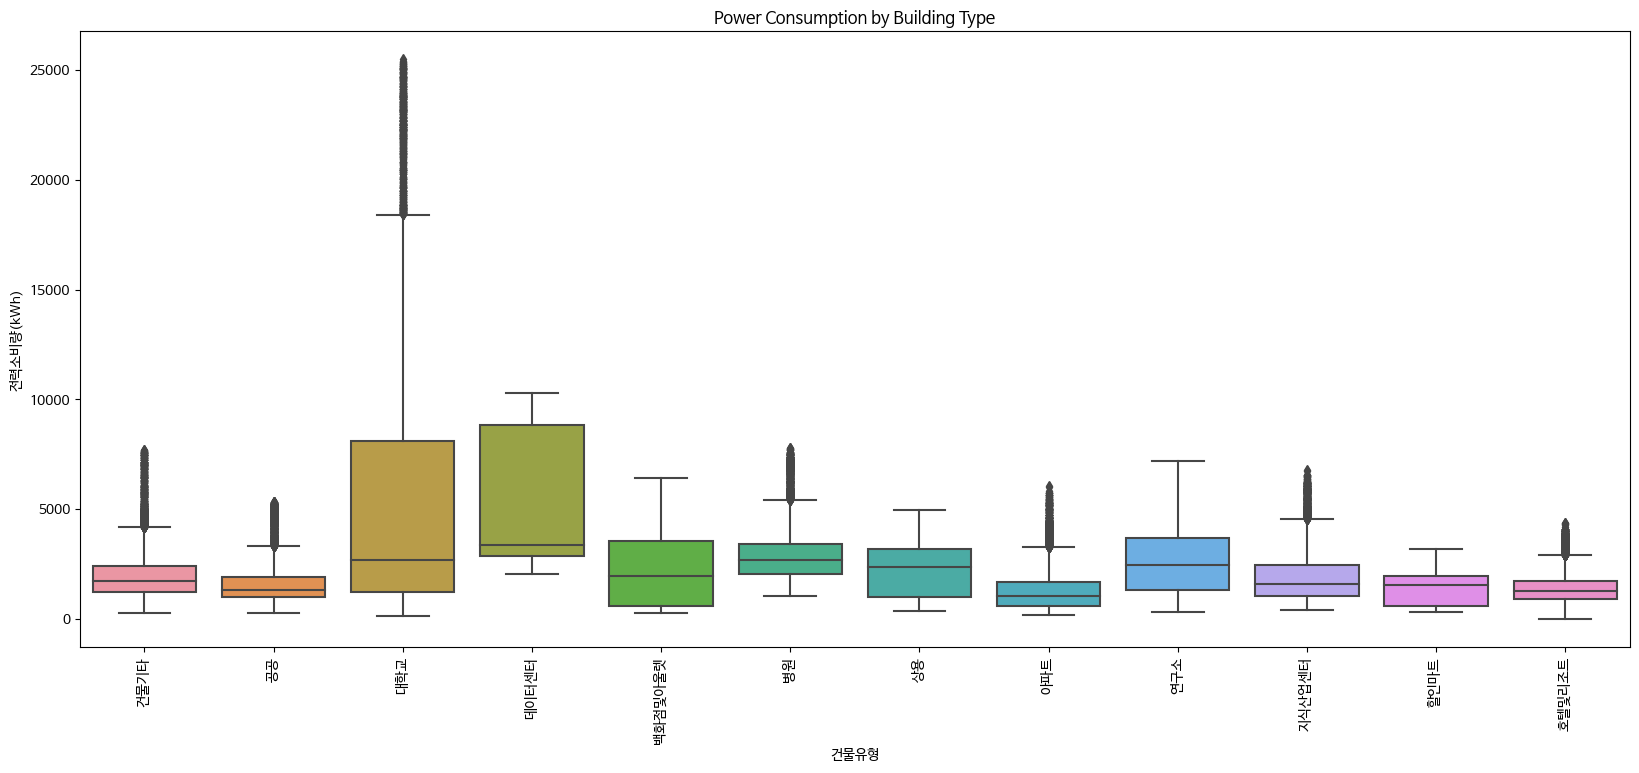

In [ ]:
plt.figure(figsize = (20, 8))
sns.boxplot(x = '건물유형', y = '전력소비량(kWh)', data = data)
plt.title('Power Consumption by Building Type')
plt.xticks(rotation = 90)
plt.show()

건물의 유형별 전력 소비량 분포이다. 대학교 건물은 소비량의 범위가 가장 넓고, 이상치가 높게 나타났다. 대학교 건물 타입의 이상치 확인이 필요하다.

In [ ]:
univ = data[data['건물유형'] == '대학교']
q3 = univ['전력소비량(kWh)'].quantile(0.75)
q1 = univ['전력소비량(kWh)'].quantile(0.25)
iqr = q3 - q1

print(q3)
print(q1)
print(iqr)

8088.09
1212.48
6875.610000000001


이상치 범위 : Q1 - 1.5 * IQR > 데이터, 데이터 > Q3 + 1.5 * IQR

In [ ]:
filter = data[(data['전력소비량(kWh)'] > 18401.505)]
filter

,건물번호,일시,날짜,연도,월,일,요일,평일,시간,기온(C),...,습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
53077,27,2022-06-02 13:00:00,20220602,2022,6,2,3,True,13,28.2,...,39.0,1.0,3.55,19440.4,대학교,578484.113,501381.53,30,0,0
53078,27,2022-06-02 14:00:00,20220602,2022,6,2,3,True,14,28.3,...,39.0,1.0,3.33,20034.0,대학교,578484.113,501381.53,30,0,0
53079,27,2022-06-02 15:00:00,20220602,2022,6,2,3,True,15,28.5,...,40.0,1.0,3.04,20440.0,대학교,578484.113,501381.53,30,0,0
53080,27,2022-06-02 16:00:00,20220602,2022,6,2,3,True,16,29.3,...,42.0,1.0,2.53,20445.6,대학교,578484.113,501381.53,30,0,0
53081,27,2022-06-02 17:00:00,20220602,2022,6,2,3,True,17,27.9,...,44.0,1.0,1.92,19479.6,대학교,578484.113,501381.53,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55068,27,2022-08-24 12:00:00,20220824,2022,8,24,2,True,12,24.3,...,68.0,0.2,1.80,20664.0,대학교,578484.113,501381.53,30,0,0
55069,27,2022-08-24 13:00:00,20220824,2022,8,24,2,True,13,24.1,...,70.0,0.1,1.45,20988.8,대학교,578484.113,501381.53,30,0,0
55070,27,2022-08-24 14:00:00,20220824,2022,8,24,2,True,14,24.1,...,67.0,0.0,1.35,20834.8,대학교,578484.113,501381.53,30,0,0
55071,27,2022-08-24 15:00:00,20220824,2022,8,24,2,True,15,24.0,...,67.0,0.0,1.25,20815.2,대학교,578484.113,501381.53,30,0,0


In [ ]:
filter['건물번호'].unique()

array([27])

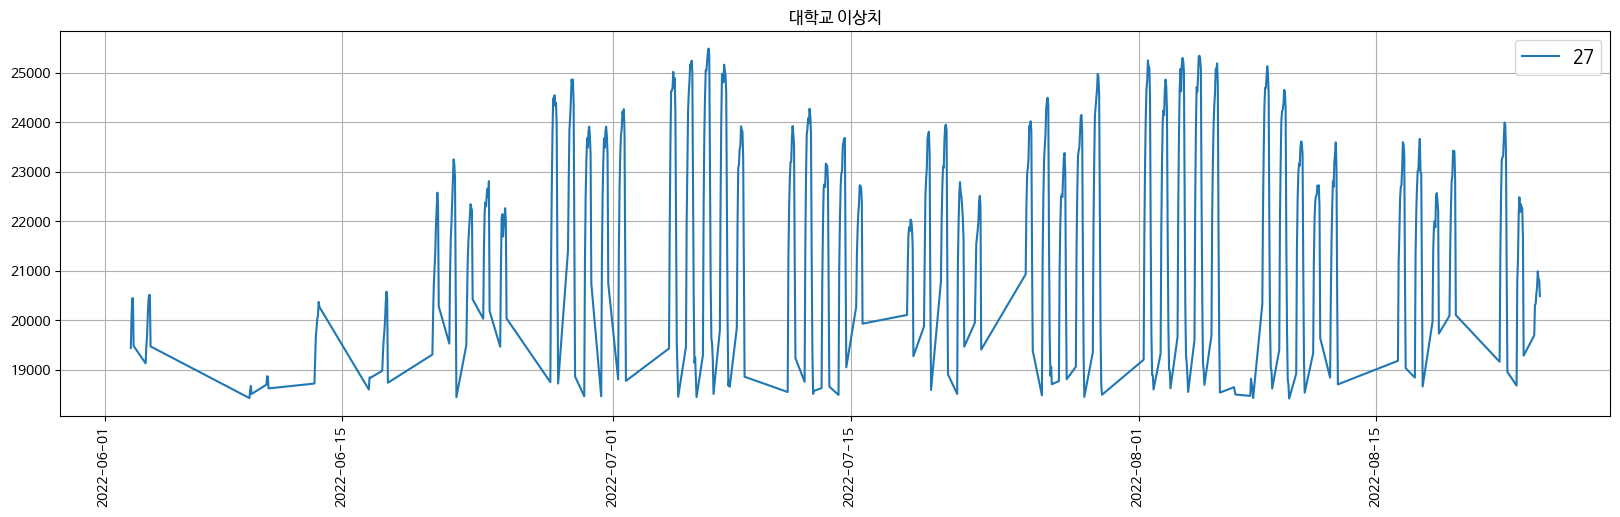

In [ ]:
plt.figure(figsize = (20, 5))
plt.title("대학교 이상치")
plt.plot(filter['일시'], filter['전력소비량(kWh)'], '-', label = str(27))
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
hotel = data[data.건물유형 == '호텔및리조트']
hotel

,건물번호,일시,날짜,연도,월,일,요일,평일,시간,기온(C),...,습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
187680,93,2022-06-01 00:00:00,20220601,2022,6,1,2,True,00,18.6,...,42.0,NaN,NaN,640.62,호텔및리조트,34845.18,31124.00,21.6,0,0
187681,93,2022-06-01 01:00:00,20220601,2022,6,1,2,True,01,18.0,...,45.0,NaN,NaN,576.18,호텔및리조트,34845.18,31124.00,21.6,0,0
187682,93,2022-06-01 02:00:00,20220601,2022,6,1,2,True,02,17.7,...,45.0,NaN,NaN,561.96,호텔및리조트,34845.18,31124.00,21.6,0,0
187683,93,2022-06-01 03:00:00,20220601,2022,6,1,2,True,03,16.7,...,48.0,NaN,NaN,574.20,호텔및리조트,34845.18,31124.00,21.6,0,0
187684,93,2022-06-01 04:00:00,20220601,2022,6,1,2,True,04,18.4,...,43.0,NaN,NaN,564.30,호텔및리조트,34845.18,31124.00,21.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,20220824,2022,8,24,2,True,19,23.1,...,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,0,0,0
203996,100,2022-08-24 20:00:00,20220824,2022,8,24,2,True,20,22.4,...,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,0,0,0
203997,100,2022-08-24 21:00:00,20220824,2022,8,24,2,True,21,21.3,...,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,0,0,0
203998,100,2022-08-24 22:00:00,20220824,2022,8,24,2,True,22,21.0,...,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,0,0,0


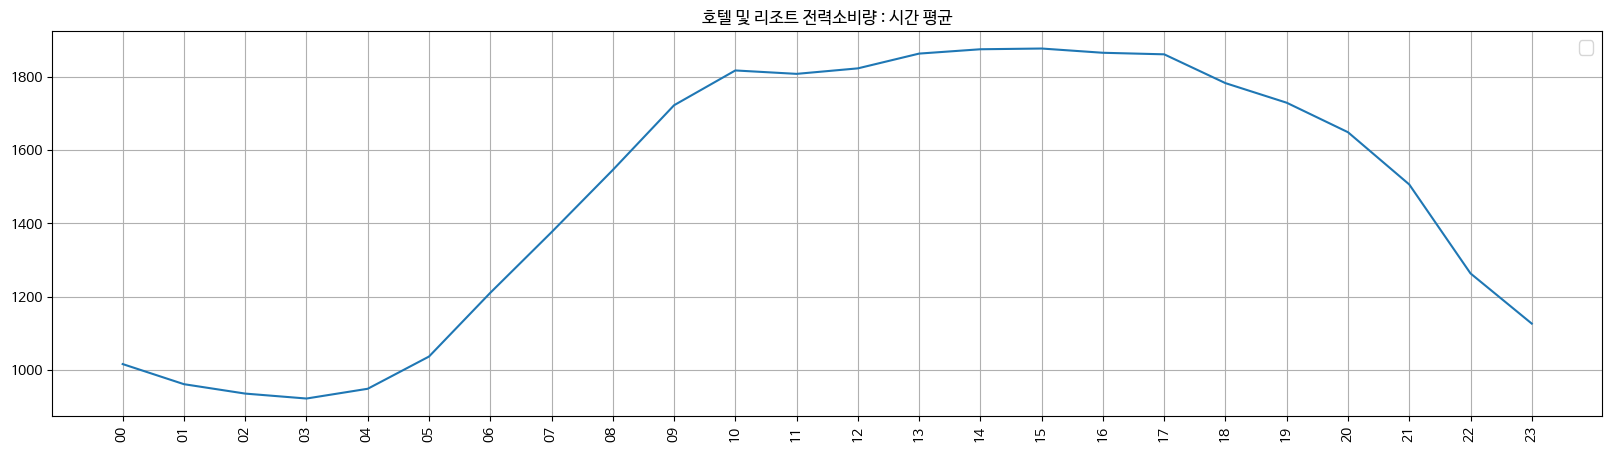

In [ ]:
mean_hotel = hotel.groupby('시간')['전력소비량(kWh)'].mean()
plt.figure(figsize = (20, 5))
plt.title("호텔 및 리조트 전력소비량 : 시간 평균")
plt.plot(mean_hotel.index, mean_hotel.values, '-')
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

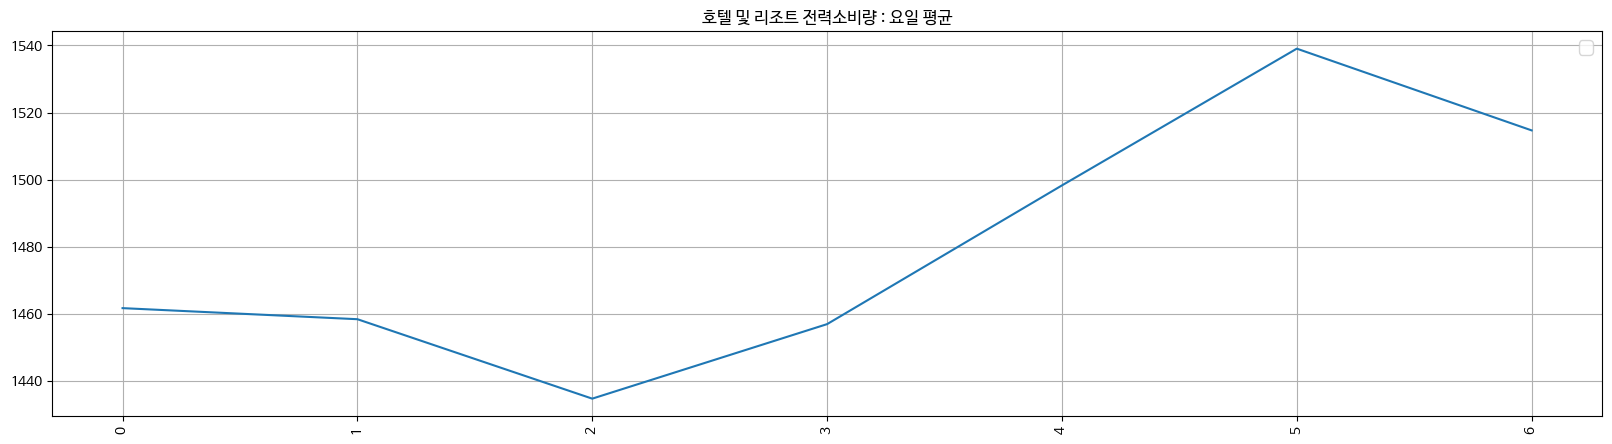

In [ ]:
mean_hotel = hotel.groupby('요일')['전력소비량(kWh)'].mean()
plt.figure(figsize = (20, 5))
plt.title("호텔 및 리조트 전력소비량 : 요일 평균")
plt.plot(mean_hotel.index, mean_hotel.values, '-')
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

0 : 월요일, 1 : 화요일, 2 : 수요일, 3 : 목요일, 4 : 금요일, 5 : 토요일, 6 : 일요일

### 평균 전력소비량

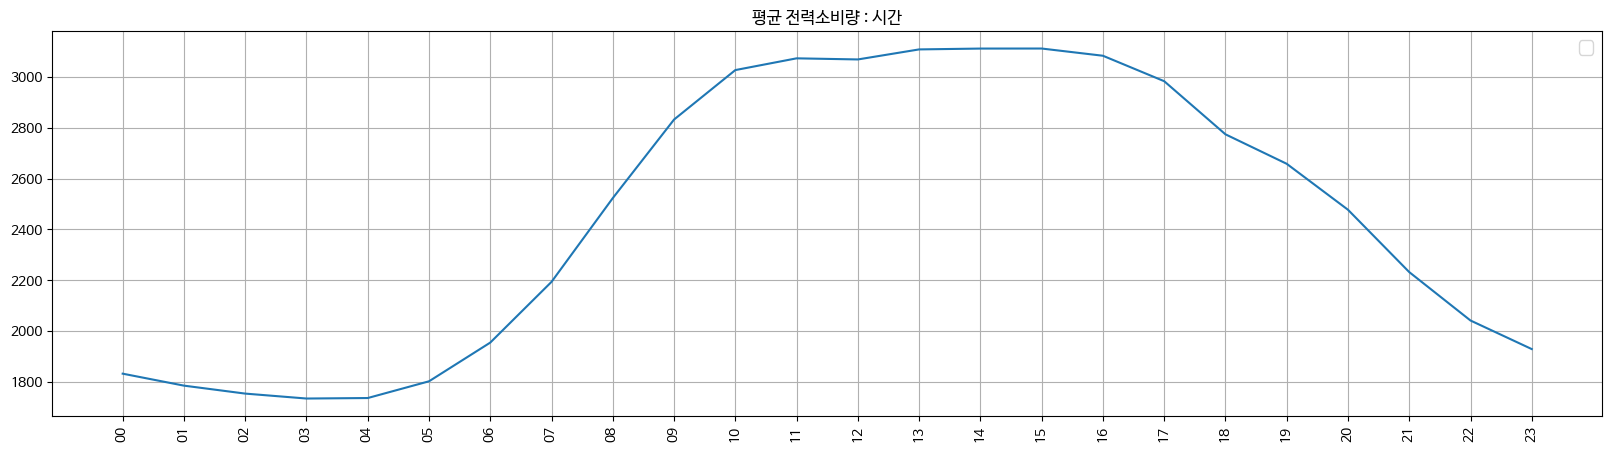

In [ ]:
hour = data.groupby('시간')['전력소비량(kWh)'].mean()
plt.figure(figsize = (20, 5))
plt.title("평균 전력소비량 : 시간")
plt.plot(hour.index, hour.values, '-')
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

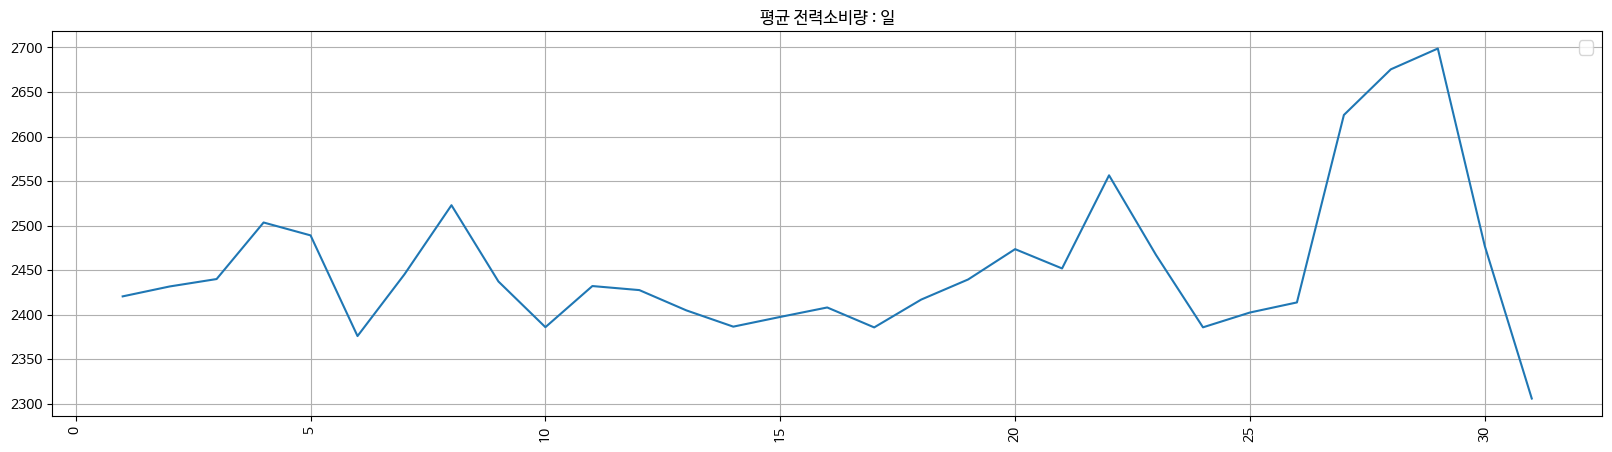

In [ ]:
day = data.groupby('일')['전력소비량(kWh)'].mean()
plt.figure(figsize = (20, 5))
plt.title("평균 전력소비량 : 일")
plt.plot(day.index, day.values, '-')
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

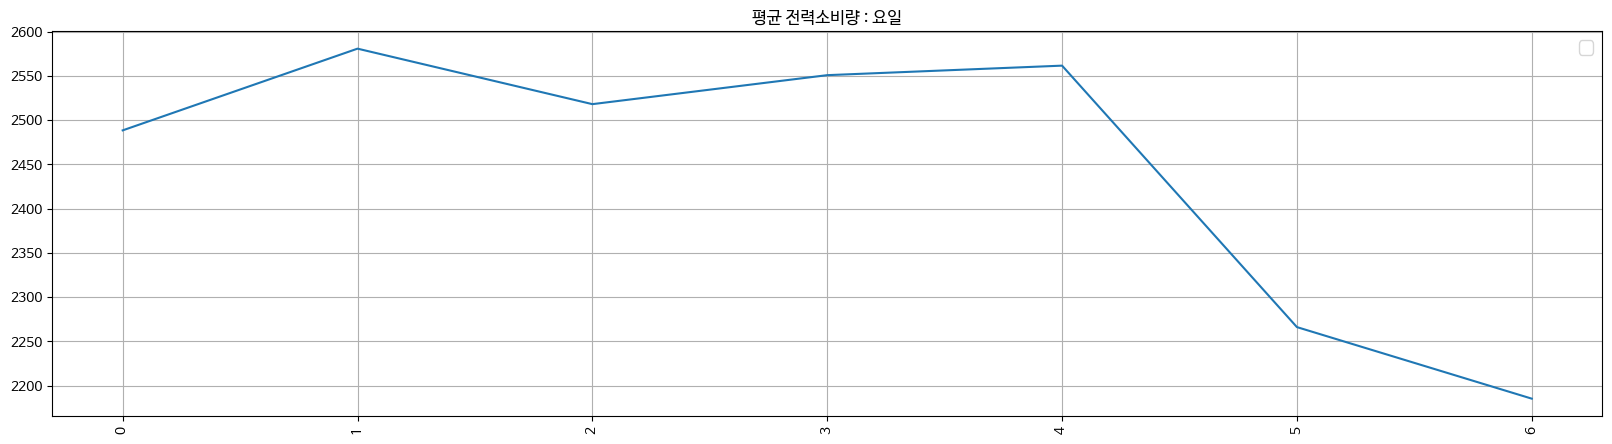

In [ ]:
weekday = data.groupby('요일')['전력소비량(kWh)'].mean()
plt.figure(figsize = (20, 5))
plt.title("평균 전력소비량 : 요일")
plt.plot(weekday.index, weekday.values, '-')
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/EDA_전력 사용량 예측.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/EDA_전력 사용량 예측.ipynb to html
[NbConvertApp] Writing 2156421 bytes to /content/drive/MyDrive/Colab Notebooks/EDA_전력 사용량 예측.html
